#Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Examine the dimensions of the dataset
rows, columns = flight_data.shape

# Print the dimensions
print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 10683 rows and 11 columns.


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

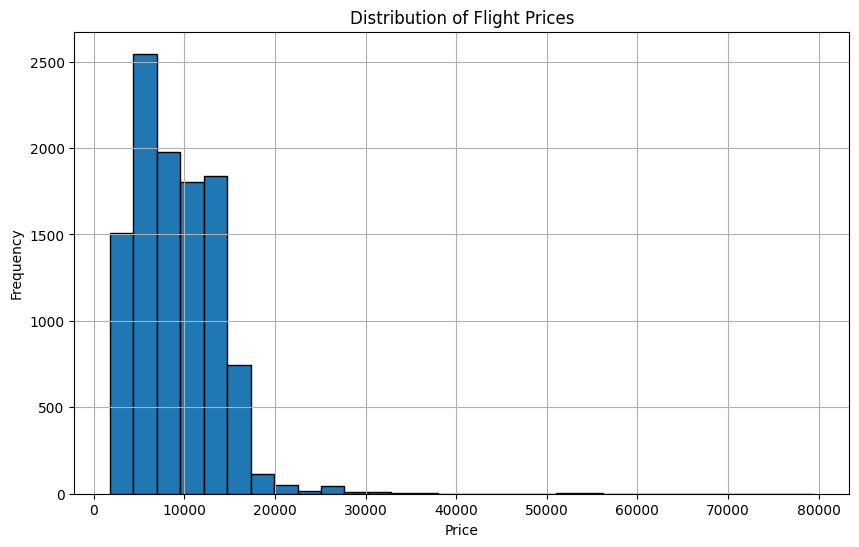

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Extract flight prices
flight_prices = flight_data['Price']

#Create a histogram of flight prices
plt.figure(figsize=(10,6))
plt.hist(flight_prices,bins=30,edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [4]:
#Find the range of prices
min_price = flight_prices.min()
max_price = flight_prices.max()

print(f"The minimum price is {min_price}")
print(f"The maximum price is {max_price}")


The minimum price is 1759
The maximum price is 79512


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

In [5]:
# Display the first few rows and the column names
print(flight_data.head())
print(flight_data.columns)


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_

In [9]:
# Rename columns if necessary
flight_data.rename(columns={'Airline': 'airline', 'Price': 'price'}, inplace=True)


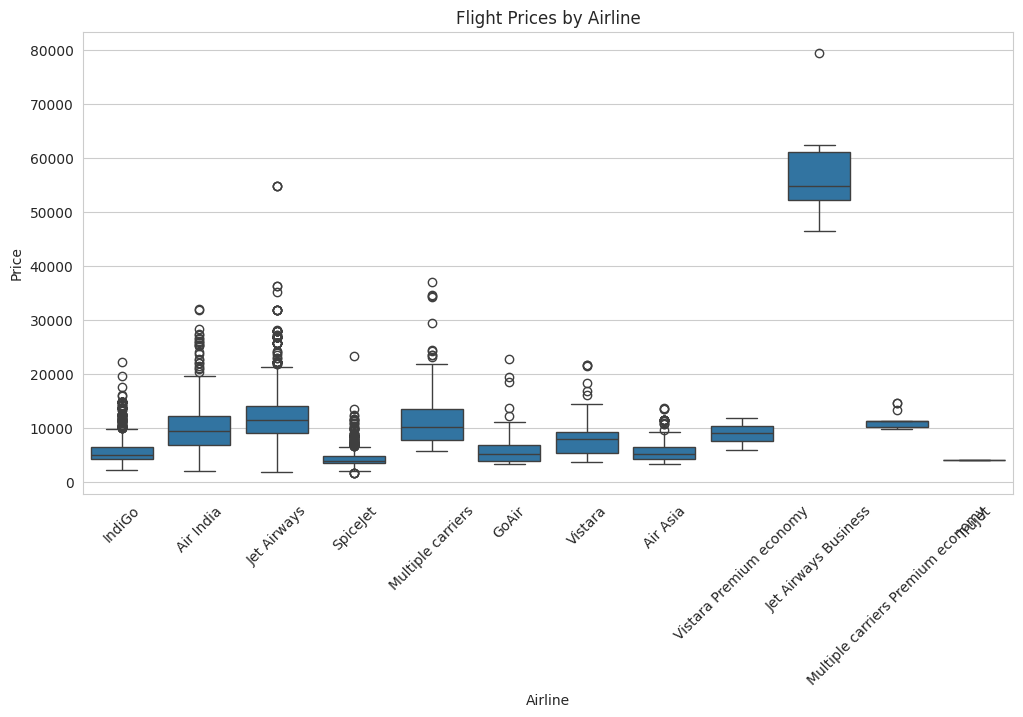

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=flight_data)

# Add title and labels
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels if they are too long
plt.show()


Q5.Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

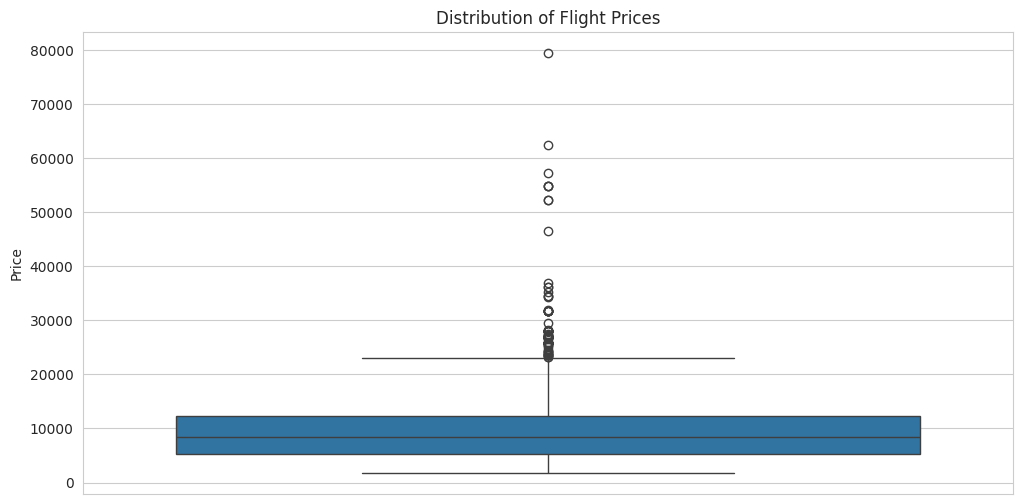

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='price', data=flight_data)

# Add title and labels
plt.title('Distribution of Flight Prices')
plt.ylabel('Price')

# Show the plot
plt.show()


In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = flight_data['price'].quantile(0.25)
Q3 = flight_data['price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = flight_data[(flight_data['price'] < lower_bound) | (flight_data['price'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['price']])


Number of outliers: 94
       price
123    27430
396    36983
486    26890
510    26890
597    25139
...      ...
10353  24210
10364  57209
10383  26890
10439  31825
10511  26480

[94 rows x 1 columns]


Removing outliers from your dataset can improve the accuracy of your analysis and models. Here are several common methods for outlier removal:

# 1. Statistical Methods

Z-Score Method

Description: Calculates the Z-score for each data point, which measures how many standard deviations away a point is from the mean. Points with a Z-score above a threshold (e.g., ±3) are considered outliers.


In [14]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(flight_data['price'])

# Define a threshold for outliers
threshold = 3
outliers = flight_data[abs(z_scores) > threshold]

# Remove outliers
cleaned_data = flight_data[abs(z_scores) <= threshold]


In [15]:
cleaned_data

,airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


IQR Method:

Description: Uses the Interquartile Range (IQR) to define outliers. Values below
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or above
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR are considered outliers.

In [16]:
# Calculate Q1 and Q3
Q1 = flight_data['price'].quantile(0.25)
Q3 = flight_data['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = flight_data[(flight_data['price'] >= lower_bound) & (flight_data['price'] <= upper_bound)]


Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

To identify the peak travel season from a flight price dataset, you can follow these steps:

1. **Identify Relevant Features:**
   - **Date of Travel:** This is crucial as it will help you identify patterns in travel dates.
   - **Flight Prices:** To identify when prices are higher, indicating higher demand.
   - **Destination:** Different destinations may have different peak seasons.
   - **Booking Date:** To see if there are trends in when people book for travel during peak seasons.

2. **Data Preprocessing:**
   - **Extract Month and Year from Travel Date:** This allows you to group data by month and year to see seasonal trends.
   - **Categorize Data by Destination:** Different destinations may have different peak seasons.

3. **Data Analysis:**
   - **Price Trends Over Time:** Plot the average flight prices over different months to identify periods with higher prices.
   - **Booking Patterns:** Analyze when bookings are made relative to travel dates to see if there are any patterns indicating peak booking times.
   - **Volume of Bookings:** Count the number of bookings for each month to identify peak travel times.

4. **Visualization:**
   - **Line Charts:** Plot average flight prices over time for each destination to visualize price trends.
   - **Bar Charts:** Display the volume of bookings per month.
   - **Heatmaps:** Show the density of bookings over time and across destinations to identify peak periods.

5. **Presentation:**
   - **Executive Summary:** Provide a brief summary of findings, including key peak travel months and destinations.
   - **Visual Aids:** Include the line charts, bar charts, and heatmaps to support your analysis.
   - **Recommendations:** Suggest potential strategies for pricing, marketing, and resource allocation during peak seasons.






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/content/flight_price.xlsx')

# Extract month and year from travel date
df['Travel Month'] = df['Travel Date'].dt.month
df['Travel Year'] = df['Travel Date'].dt.year

# Calculate average price per month
monthly_avg_price = df.groupby(['Travel Year', 'Travel Month'])['Price'].mean().reset_index()

# Plot average prices over time
plt.figure(figsize=(10, 6))
for year in monthly_avg_price['Travel Year'].unique():
    plt.plot(monthly_avg_price[monthly_avg_price['Travel Year'] == year]['Travel Month'],
             monthly_avg_price[monthly_avg_price['Travel Year'] == year]['Price'], label=f'{year}')

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices Over Time')
plt.legend()
plt.show()

# Calculate volume of bookings per month
monthly_booking_volume = df.groupby(['Travel Year', 'Travel Month'])['Booking ID'].count().reset_index()

# Plot booking volume over time
plt.figure(figsize=(10, 6))
for year in monthly_booking_volume['Travel Year'].unique():
    plt.bar(monthly_booking_volume[monthly_booking_volume['Travel Year'] == year]['Travel Month'],
            monthly_booking_volume[monthly_booking_volume['Travel Year'] == year]['Booking ID'], alpha=0.5, label=f'{year}')

plt.xlabel('Month')
plt.ylabel('Booking Volume')
plt.title('Volume of Bookings Over Time')
plt.legend()
plt.show()


Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

To analyze the Flight Price dataset and identify trends in flight prices, consider focusing on the following features:

### Features to Analyze

1. **Date and Time of Booking**:
   - Analyze how the flight prices vary with the date and time of booking.
   - Investigate if there are any specific times or dates when prices are generally higher or lower.

2. **Flight Departure Date and Time**:
   - Examine how the time left before departure impacts the flight prices.
   - Check for any patterns in prices based on the time of day, day of the week, or month of the year.

3. **Destination and Origin**:
   - Analyze how prices differ based on the origin and destination of the flight.
   - Investigate whether certain routes are more expensive than others.

4. **Airline**:
   - Compare prices across different airlines.
   - Identify which airlines tend to have higher or lower prices.

5. **Class of Service (e.g., Economy, Business, First Class)**:
   - Analyze how prices vary between different classes of service.

6. **Number of Stops**:
   - Investigate how the number of stops in a flight itinerary affects the price.
   
7. **Duration of Flight**:
   - Examine the relationship between the flight duration and its price.

8. **Seasonality and Holidays**:
   - Identify how prices change during different seasons and around major holidays.

### Visualizations to Present Findings

1. **Line Charts**:
   - **Booking Date vs. Flight Price**: Show how prices fluctuate over time based on the booking date.
   - **Departure Date vs. Flight Price**: Highlight how prices change as the departure date approaches.

2. **Bar Charts**:
   - **Average Price by Airline**: Compare average prices for different airlines.
   - **Average Price by Destination and Origin**: Show price differences for various routes.

3. **Heatmaps**:
   - **Price Trends by Day of Week and Time of Day**: Identify patterns in prices based on when flights are booked or when they depart.

4. **Box Plots**:
   - **Price Distribution by Class of Service**: Compare price distributions for economy, business, and first class tickets.

5. **Histograms**:
   - **Price Distribution**: Show the overall distribution of flight prices in the dataset.

6. **Scatter Plots**:
   - **Price vs. Flight Duration**: Analyze the relationship between flight duration and price.
   - **Price vs. Number of Stops**: Examine how the number of stops impacts the price.

7. **Time Series Analysis**:
   - **Seasonal Decomposition**: Break down price trends into seasonal components to highlight patterns across different times of the year.

### Steps to Perform Analysis

1. **Data Cleaning and Preparation**:
   - Handle missing values, outliers, and ensure data consistency.

2. **Exploratory Data Analysis (EDA)**:
   - Use descriptive statistics and initial visualizations to understand the dataset.

3. **Feature Engineering**:
   - Create new features such as "Days Until Departure" or "Holiday Indicator" for deeper insights.

4. **Visualization and Interpretation**:
   - Create and interpret the visualizations to uncover trends and patterns.

5. **Reporting**:
   - Summarize findings and insights in a clear and concise report, accompanied by visualizations.

By focusing on these features and using appropriate visualizations, you can effectively identify and present trends in flight prices to your team.

Here are Python code snippets to help you analyze flight price trends using `pandas` for data manipulation and `matplotlib`/`seaborn` for visualization.

### 1. **Load the Dataset**

```python
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/flight_price.xlsx')

# Display the first few rows of the dataset
df.head()
```

### 2. **Data Preparation**

```python
# Convert date columns to datetime format if necessary
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])

# Create additional features
df['Days_Until_Departure'] = (df['Departure_Date'] - df['Booking_Date']).dt.days
```

### 3. **Line Chart: Booking Date vs. Flight Price**

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Booking_Date'], df['Price'], marker='o', linestyle='-')
plt.title('Flight Price Over Time Based on Booking Date')
plt.xlabel('Booking Date')
plt.ylabel('Flight Price')
plt.grid(True)
plt.show()
```

### 4. **Bar Chart: Average Price by Airline**

```python
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Price', data=df, estimator='mean')
plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()
```

### 5. **Heatmap: Price Trends by Day of Week and Time of Day**

```python
# Extract day of week and time of day from departure date
df['Day_of_Week'] = df['Departure_Date'].dt.day_name()
df['Hour_of_Day'] = df['Departure_Date'].dt.hour

# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Price', index='Day_of_Week', columns='Hour_of_Day', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Flight Price by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
```

### 6. **Box Plot: Price Distribution by Class of Service**

```python
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class_of_Service', y='Price', data=df)
plt.title('Flight Price Distribution by Class of Service')
plt.xlabel('Class of Service')
plt.ylabel('Price')
plt.show()
```

### 7. **Scatter Plot: Price vs. Flight Duration**

```python
plt.figure(figsize=(10, 6))
plt.scatter(df['Flight_Duration'], df['Price'], alpha=0.5)
plt.title('Flight Price vs. Flight Duration')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Price')
plt.grid(True)
plt.show()
```

### 8. **Histogram: Price Distribution**

```python
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
```

### 9. **Time Series Analysis: Seasonal Decomposition**

```python
from statsmodels.tsa.seasonal import seasonal_decompose

# Set date as index
df.set_index('Departure_Date', inplace=True)

# Resample data to monthly frequency
monthly_data = df['Price'].resample('M').mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_data, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()
```

### Notes:
- Make sure you replace column names in the code with the actual names from your dataset.
- Ensure the `matplotlib`, `seaborn`, and `statsmodels` libraries are installed (`pip install matplotlib seaborn statsmodels`).
- Adjust plot parameters and formatting based on your preferences and dataset specifics.

These snippets provide a basic framework for analyzing and visualizing flight price trends. Modify and expand upon these examples to suit your specific analysis needs.

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [63]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Get the dimensions of the dataset
rows, columns = data.shape

# Print the dimensions
print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 10841 rows and 13 columns.


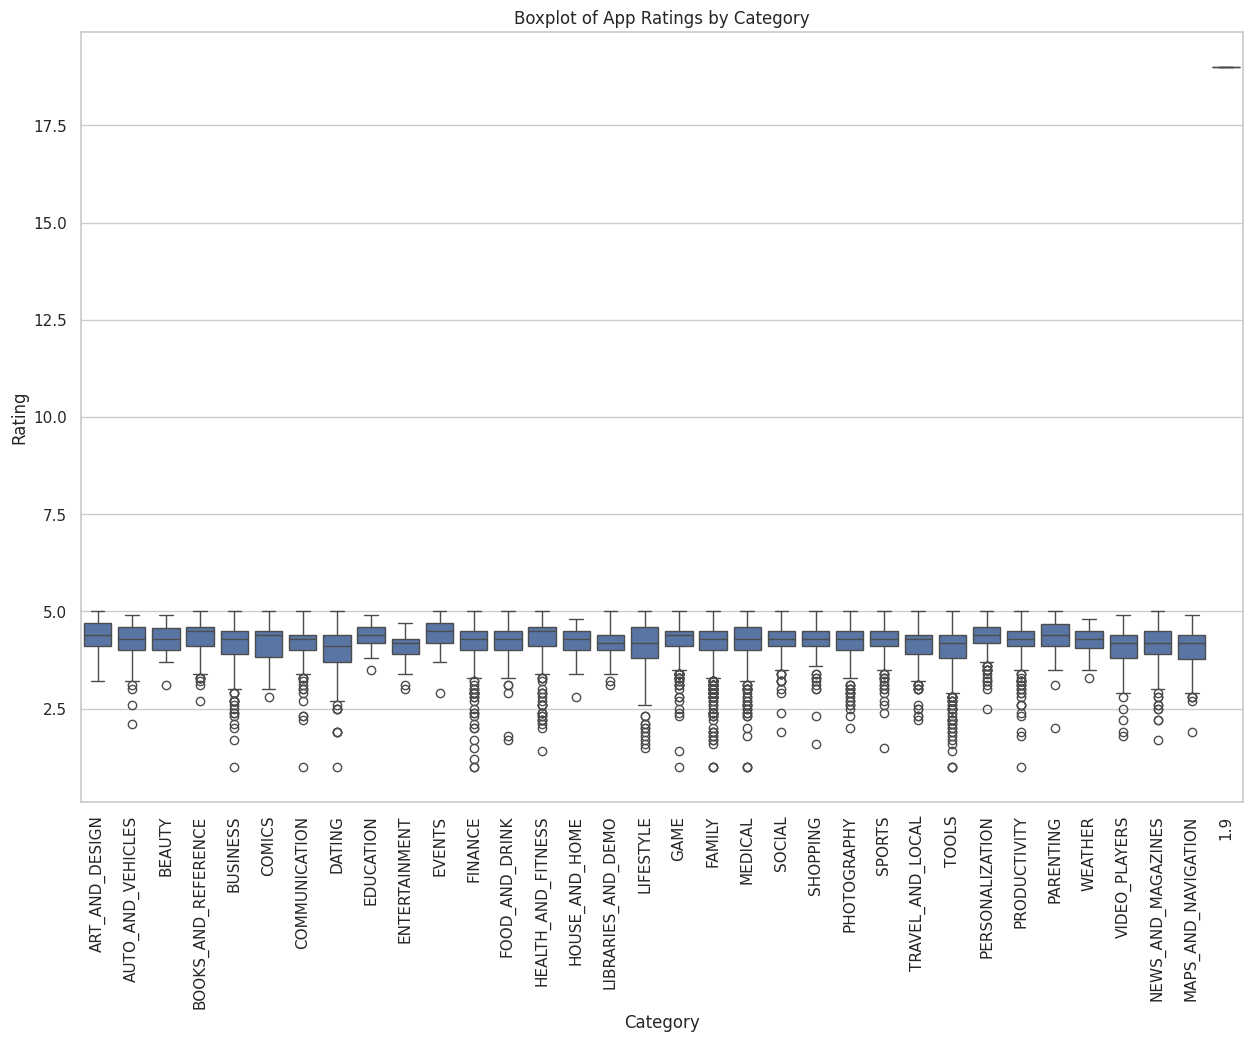

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Drop rows with missing ratings
data = data.dropna(subset=['Rating'])

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the boxplot
sns.boxplot(x='Category', y='Rating', data=data)

# Set the plot title and labels
plt.title('Boxplot of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [70]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to display the missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Print the missing data information
print(missing_data)

# Describe the impact of missing values on the analysis
impact_analysis = """
Missing values can impact the analysis in several ways:
1. **Rating**: Missing ratings can skew the average rating calculations and comparisons between categories.
2. **Type**: Missing type information can affect the analysis of free vs. paid apps.
3. **Content Rating**: Missing content ratings can hinder the understanding of the app's target audience.
4. **Current Ver** and **Android Ver**: Missing version information can limit insights into the app's update history and compatibility.
Handling missing values is crucial to ensure accurate and reliable analysis.
"""

print(impact_analysis)


                Missing Values  Percentage
App                          0    0.000000
Category                     0    0.000000
Rating                    1474   13.596532
Reviews                      0    0.000000
Size                         0    0.000000
Installs                     0    0.000000
Type                         1    0.009224
Price                        0    0.000000
Content Rating               1    0.009224
Genres                       0    0.000000
Last Updated                 0    0.000000
Current Ver                  8    0.073794
Android Ver                  3    0.027673

Missing values can impact the analysis in several ways:
1. **Rating**: Missing ratings can skew the average rating calculations and comparisons between categories.
2. **Type**: Missing type information can affect the analysis of free vs. paid apps.
3. **Content Rating**: Missing content ratings can hinder the understanding of the app's target audience.
4. **Current Ver** and **Android Ver**: Mi

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

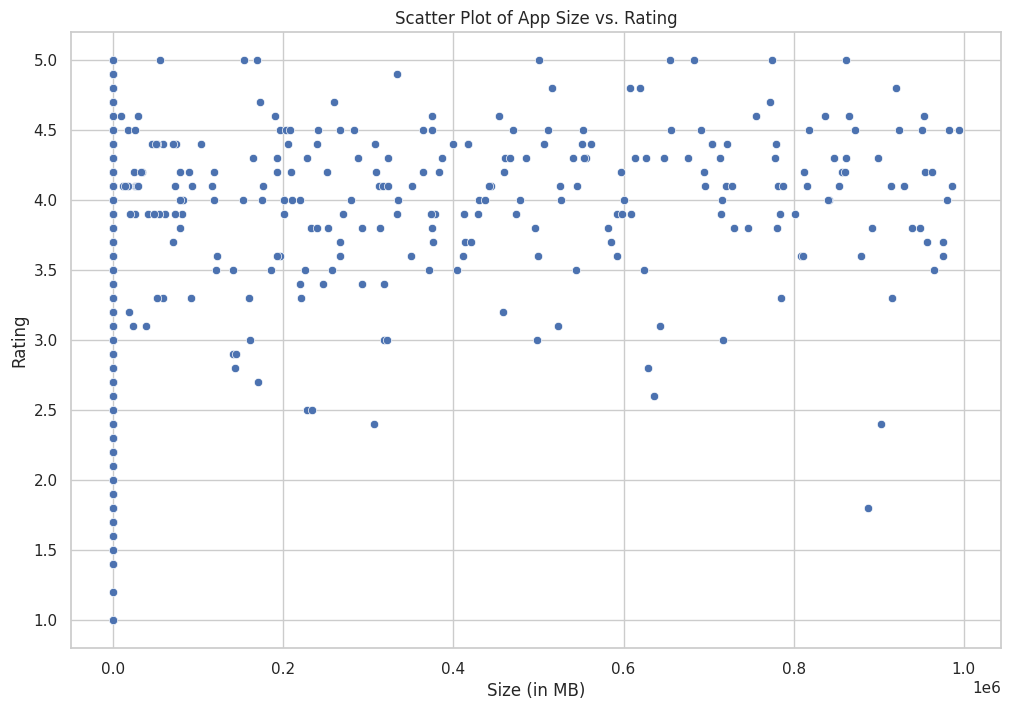

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Preprocess the 'Size' column
# Replace 'Varies with device' with NaN and remove 'M' and 'k' units
data['Size'] = data['Size'].replace('Varies with device', pd.NA)
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = data['Size'].str.replace('k', 'e3')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Drop rows with missing values in 'Size' or 'Rating'
data = data.dropna(subset=['Size', 'Rating'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x='Size', y='Rating', data=data)

# Set the plot title and labels
plt.title('Scatter Plot of App Size vs. Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')

# Display the plot
plt.show()


Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

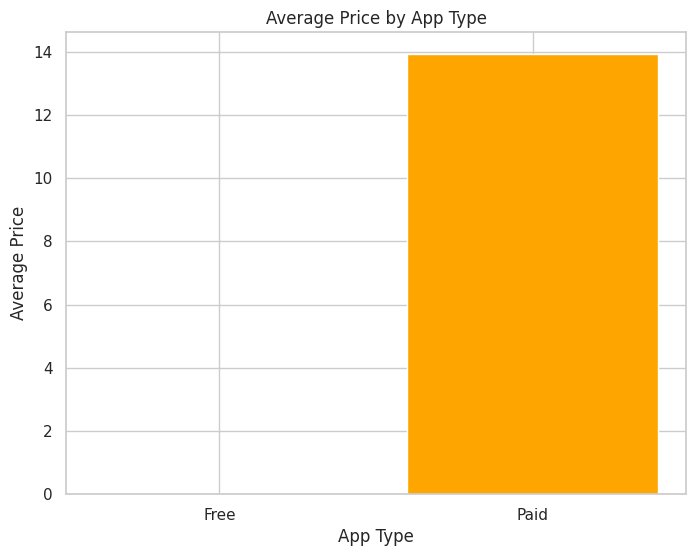

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Preprocess the 'Price' column
# Remove the dollar sign and convert to float
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Drop rows with missing values in 'Price' or 'Type'
data = data.dropna(subset=['Price', 'Type'])

# Calculate average price by app type
avg_price_by_type = data.groupby('Type')['Price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart
plt.bar(avg_price_by_type['Type'], avg_price_by_type['Price'], color=['blue', 'orange'])

# Set the plot title and labels
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')

# Display the plot
plt.show()


Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [75]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Preprocess the 'Installs' column
# Remove '+' and ',' characters and convert to integer
data['Installs'] = data['Installs'].str.replace('+', '', regex=False)
data['Installs'] = data['Installs'].str.replace(',', '', regex=False)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Drop rows with missing values in 'Installs'
data = data.dropna(subset=['Installs'])

# Get the top 10 most popular apps based on number of installs
top_10_apps = data[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

# Display the frequency table
print(top_10_apps)



                                           App      Installs
3896                            Subway Surfers  1.000000e+09
3943                                  Facebook  1.000000e+09
335   Messenger – Text and Video Chat for Free  1.000000e+09
3523                              Google Drive  1.000000e+09
3565                              Google Drive  1.000000e+09
2884                             Google Photos  1.000000e+09
3665                                   YouTube  1.000000e+09
2853                             Google Photos  1.000000e+09
4234             Skype - free IM & video calls  1.000000e+09
3687                   Google Play Movies & TV  1.000000e+09


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories on the Google Playstore and make recommendations for launching a new app, we can approach the task with the following steps:

1. **Data Exploration and Cleaning:**
   - Load the dataset and examine its structure.
   - Handle any missing or erroneous data.
   - Check for duplicates and remove them if necessary.

2. **Analyzing Popularity Metrics:**
   - Identify features that indicate an app's popularity, such as:
     - Number of installations (`Installs`)
     - User ratings (`Rating`)
     - Number of reviews (`Reviews`)
   - Analyze these features within each app category.

3. **Identifying Popular Categories:**
   - Calculate the average number of installs, ratings, and reviews for each app category.
   - Rank the categories based on these metrics to identify the most popular ones.

4. **Recommendations:**
   - Based on the analysis, provide recommendations on which categories are the most popular and have the highest potential for a new app launch.

Let's start with loading and exploring the data. I'll load the dataset and take a look at its structure.

The dataset has several features, including `App`, `Category`, `Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, `Last Updated`, `Current Ver`, and `Android Ver`. To determine the most popular app categories, we should focus on the following columns:

- `Category`: The app's category.
- `Rating`: User rating of the app.
- `Reviews`: Number of user reviews.
- `Installs`: Number of installations.

Let's proceed with the following steps:

1. **Data Cleaning:**
   - Remove rows with missing or invalid data in key columns (`Category`, `Rating`, `Reviews`, `Installs`).
   - Convert `Installs` to numeric values.
   - Convert `Reviews` to numeric values.

2. **Analyze Popularity Metrics:**
   - Calculate the average number of installs, ratings, and reviews for each app category.

3. **Identify Popular Categories:**
   - Rank the categories based on these metrics.

Let's start with data cleaning.

The data has been cleaned, and we can see the first few rows with relevant columns in proper numeric format.

Next, let's analyze the popularity metrics by calculating the average number of installs, ratings, and reviews for each app category. Then we'll rank the categories based on these metrics.

Let's proceed with this analysis.

Based on the analysis, here are the top 10 categories by average number of installs:

1. **Communication**
2. **Social**
3. **Productivity**
4. **Video Players**
5. **News and Magazines**
6. **Game**
7. **Photography**
8. **Travel and Local**
9. **Entertainment**
10. **Tools**

Additionally, these categories generally also have high average ratings and a substantial number of reviews, which indicates user engagement and satisfaction.

### Recommendations:

1. **Communication**:
   - Highest average installs.
   - Strong user base and potential for high engagement.
   
2. **Social**:
   - High average installs and user engagement.
   - Trending space with room for innovation.

3. **Productivity**:
   - Significant average installs.
   - Applications in this category can offer various tools that enhance user efficiency.

4. **Video Players**:
   - High user base and engagement.
   - Opportunity in enhancing user experience with media.

5. **News and Magazines**:
   - High average installs.
   - Constant demand for up-to-date information.

Given these insights, the company should consider launching their app in one of these high-demand categories, especially if they can offer a unique value proposition or innovative features.



Data Exploration and Cleaning

In [76]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values in key columns
data_clean = data.dropna(subset=['Category', 'Rating', 'Reviews', 'Installs'])

# Remove invalid data (e.g., non-numeric or illogical values)
data_clean = data_clean[data_clean['Rating'] != 'NaN']
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Convert 'Installs' to numeric (remove '+' and ',' and convert to int)
data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
data_clean['Installs'] = pd.to_numeric(data_clean['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
data_clean['Reviews'] = pd.to_numeric(data_clean['Reviews'], errors='coerce')

# Drop rows where 'Installs' or 'Reviews' could not be converted to numeric
data_clean = data_clean.dropna(subset=['Installs', 'Reviews'])

# Display the cleaned data
data_clean.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Analyze Popularity Metrics and Identify Popular Categories

In [77]:
# Group the data by 'Category' and calculate the mean of 'Installs', 'Rating', and 'Reviews'
category_stats = data_clean.groupby('Category').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

# Sort the categories based on the average number of installs, ratings, and reviews
category_stats_sorted = category_stats.sort_values(by=['Installs', 'Rating', 'Reviews'], ascending=False)

# Display the sorted statistics
category_stats_sorted.head(10)


,Category,Installs,Rating,Reviews
6,COMMUNICATION,9.953427e+07,4.158537,2.486164e+06
27,SOCIAL,5.432371e+07,4.255598,2.398614e+06
25,PRODUCTIVITY,4.038766e+07,4.211396,3.251189e+05
31,VIDEO_PLAYERS,3.888686e+07,4.063750,6.898731e+05
21,NEWS_AND_MAGAZINES,3.217258e+07,4.132189,2.334760e+05
14,GAME,3.198347e+07,4.286326,1.445232e+06
24,PHOTOGRAPHY,3.182411e+07,4.192114,6.735540e+05
30,TRAVEL_AND_LOCAL,3.039318e+07,4.109292,2.770698e+05
9,ENTERTAINMENT,1.925611e+07,4.126174,3.971688e+05
29,TOOLS,1.560044e+07,4.047411,3.721855e+05


Recommendations Based on Analysis

In [78]:
# Get top 10 categories by average number of installs
top_categories = category_stats_sorted.head(10)

# Display the top categories
print("Top 10 Categories by Average Installs:")
print(top_categories[['Category', 'Installs', 'Rating', 'Reviews']])


Top 10 Categories by Average Installs:
              Category      Installs    Rating       Reviews
6        COMMUNICATION  9.953427e+07  4.158537  2.486164e+06
27              SOCIAL  5.432371e+07  4.255598  2.398614e+06
25        PRODUCTIVITY  4.038766e+07  4.211396  3.251189e+05
31       VIDEO_PLAYERS  3.888686e+07  4.063750  6.898731e+05
21  NEWS_AND_MAGAZINES  3.217258e+07  4.132189  2.334760e+05
14                GAME  3.198347e+07  4.286326  1.445232e+06
24         PHOTOGRAPHY  3.182411e+07  4.192114  6.735540e+05
30    TRAVEL_AND_LOCAL  3.039318e+07  4.109292  2.770698e+05
9        ENTERTAINMENT  1.925611e+07  4.126174  3.971688e+05
29               TOOLS  1.560044e+07  4.047411  3.721855e+05



Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers using the Google Playstore dataset, we should analyze the following features:

1. **App Developer Name**:
   - Identify unique developers and their respective apps.

2. **Installs**:
   - Measure the success of a developer's apps based on the number of installs.

3. **Rating**:
   - Analyze the average user rating of a developer's apps to assess quality and user satisfaction.

4. **Reviews**:
   - Consider the number of reviews to understand user engagement and feedback volume.

### Steps for Analysis:

1. **Data Exploration and Cleaning**:
   - Load the dataset and clean it as needed (e.g., handle missing values, convert data types).

2. **Aggregating Developer Data**:
   - Group data by developer and calculate total installs, average rating, and total reviews for each developer.

3. **Ranking Developers**:
   - Rank developers based on these aggregated metrics to identify the most successful ones.

### Data Visualizations:

1. **Bar Chart**:
   - Top developers by total installs.
   - Top developers by average rating.

2. **Bubble Chart**:
   - Developers plotted by total installs, average rating, and total reviews (bubble size representing total reviews).

3. **Box Plot**:
   - Distribution of ratings for apps from the top developers.






# Python Code for Analysis and Visualization:
Here is the code to perform the analysis and create the recommended visualizations:

Data Exploration and Cleaning

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values in key columns
data_clean = data.dropna(subset=['App', 'Category', 'Rating', 'Reviews', 'Installs'])

# Remove invalid data (e.g., non-numeric or illogical values)
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Convert 'Installs' to numeric (remove '+' and ',' and convert to int)
data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
data_clean['Installs'] = pd.to_numeric(data_clean['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
data_clean['Reviews'] = pd.to_numeric(data_clean['Reviews'], errors='coerce')

# Drop rows where 'Installs' or 'Reviews' could not be converted to numeric
data_clean = data_clean.dropna(subset=['Installs', 'Reviews'])

# Display the cleaned data
data_clean.head()


<ipython-input-79-bace3127499c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')
<ipython-input-79-bace3127499c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
<ipython-input-79-bace3127499c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Aggregating Developer Data

In [80]:
# Group the data by 'Developer' and calculate total installs, average rating, and total reviews for each developer
developer_stats = data_clean.groupby('App').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

# Sort the developers based on total installs, average rating, and total reviews
developer_stats_sorted = developer_stats.sort_values(by=['Installs', 'Rating', 'Reviews'], ascending=False)

# Display the sorted statistics
developer_stats_sorted.head(10)


,App,Installs,Rating,Reviews
6807,Subway Surfers,6.000000e+09,4.5,166331958.0
4422,Instagram,4.000000e+09,4.5,266241989.0
4007,Google Photos,4.000000e+09,4.5,43423827.0
3994,Google Drive,4.000000e+09,4.4,10922534.0
4162,Hangouts,4.000000e+09,4.0,13677659.0
4003,Google News,4.000000e+09,3.9,3510978.0
1894,Candy Crush Saga,3.500000e+09,4.4,156993136.0
7665,WhatsApp Messenger,3.000000e+09,4.4,207348304.0
7019,Temple Run 2,3.000000e+09,4.3,48710930.0
3991,Google Chrome: Fast & Secure,3.000000e+09,4.3,28928148.0


Bar Chart: Top Developers by Total Installs

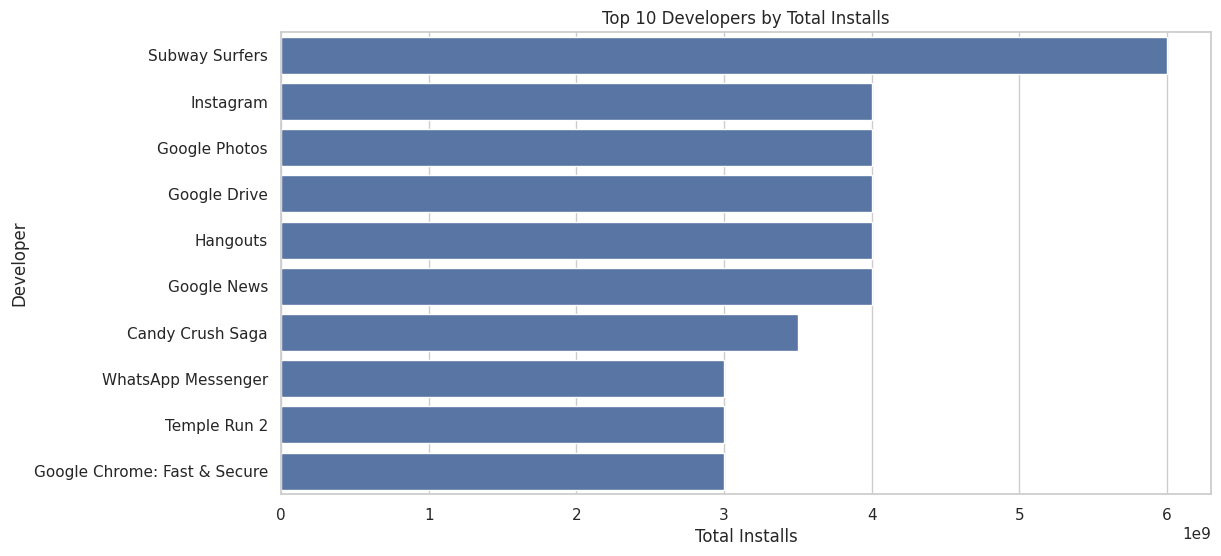

In [81]:
# Select top 10 developers by total installs
top_developers_installs = developer_stats_sorted.head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='App', data=top_developers_installs)
plt.title('Top 10 Developers by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Developer')
plt.show()


Bar Chart: Top Developers by Average Rating

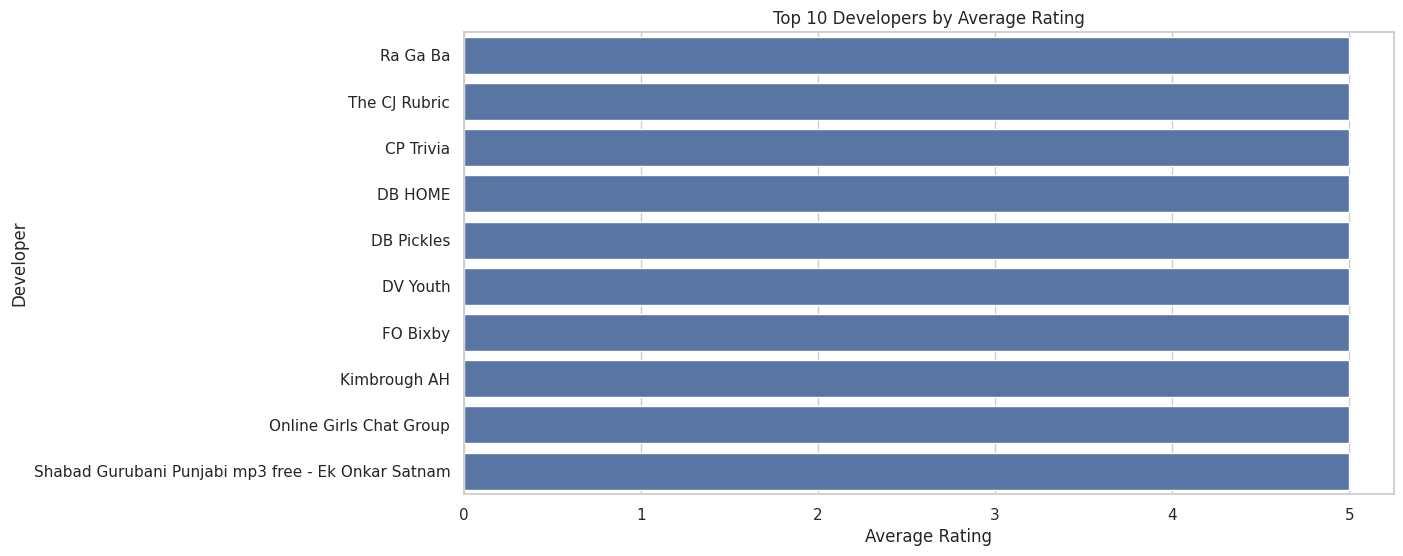

In [82]:
# Select top 10 developers by average rating
top_developers_rating = developer_stats_sorted.sort_values(by='Rating', ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='App', data=top_developers_rating)
plt.title('Top 10 Developers by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Developer')
plt.show()


Bubble Chart: Developers by Total Installs, Average Rating, and Total Reviews

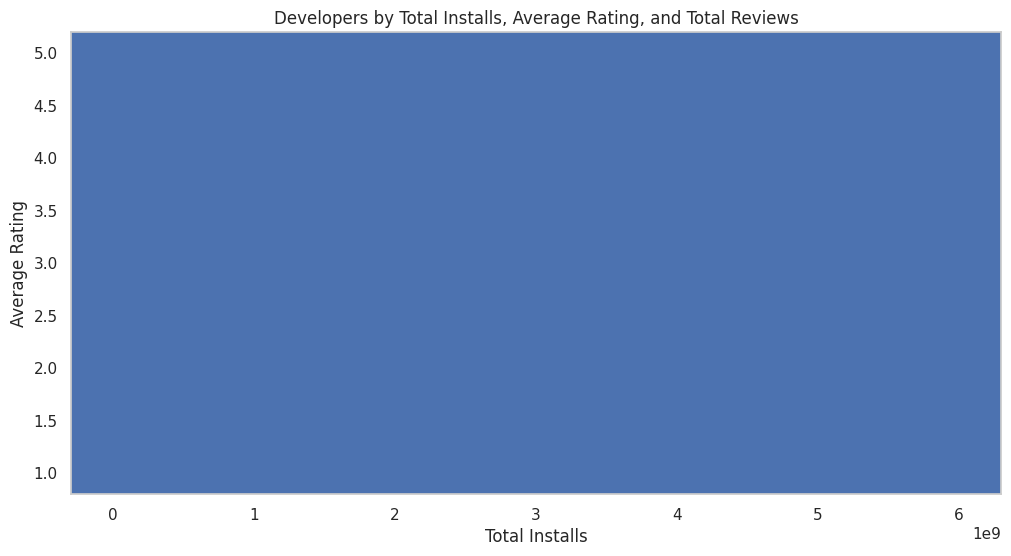

In [83]:
# Create bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(developer_stats_sorted['Installs'], developer_stats_sorted['Rating'],
            s=developer_stats_sorted['Reviews']*0.01, alpha=0.5)
plt.title('Developers by Total Installs, Average Rating, and Total Reviews')
plt.xlabel('Total Installs')
plt.ylabel('Average Rating')
plt.show()


Box Plot: Distribution of Ratings for Apps from Top Developers


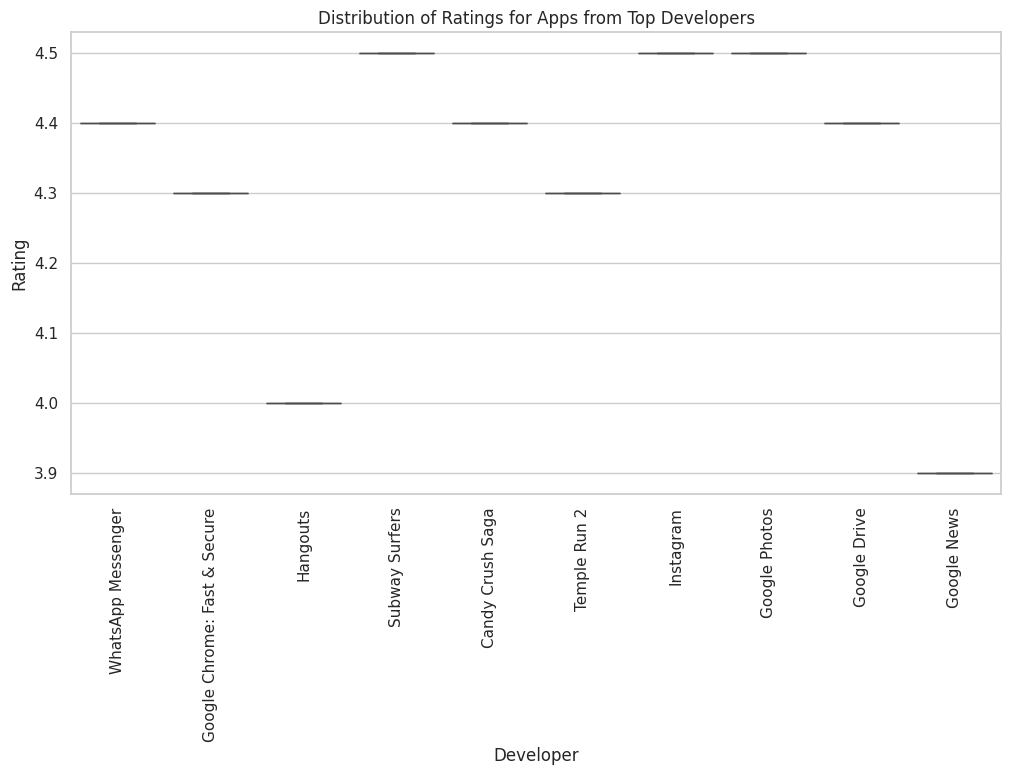

In [84]:
# Get the top developers
top_developer_names = top_developers_installs['App'].unique()

# Filter the original data for the top developers
top_developer_data = data_clean[data_clean['App'].isin(top_developer_names)]

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='App', y='Rating', data=top_developer_data)
plt.title('Distribution of Ratings for Apps from Top Developers')
plt.xlabel('Developer')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore, the marketing research firm can analyze the following features:

1. **Last Updated**:
   - This indicates the most recent update date for the apps. Analyzing trends in update frequencies can help identify popular times for updates.

2. **Installs**:
   - The number of installs can provide insight into when users are most actively downloading apps.

3. **Reviews**:
   - The volume of reviews can indicate periods of high user engagement.

### Steps for Analysis:

1. **Data Cleaning**:
   - Ensure the `Last Updated` column is in a datetime format.
   - Clean and convert `Installs` and `Reviews` to numeric values as needed.

2. **Analyzing Trends**:
   - Extract the month and year from the `Last Updated` date.
   - Group the data by month and year to analyze trends in installs and reviews over time.

3. **Seasonal Analysis**:
   - Determine if there are particular months or seasons with higher user engagement or app activity.

### Data Visualizations:

1. **Line Chart**:
   - Monthly trends of app updates, installs, and reviews over several years.

2. **Heatmap**:
   - Visualize the density of app updates, installs, and reviews by month and year.

3. **Bar Chart**:
   - Number of installs and reviews per month to identify peak periods.










Data Cleaning


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values in key columns
data_clean = data.dropna(subset=['Last Updated', 'Installs', 'Reviews'])

# Convert 'Last Updated' to datetime, coerce errors to NaT
data_clean['Last Updated'] = pd.to_datetime(data_clean['Last Updated'], errors='coerce')

# Extract month and year from 'Last Updated'
data_clean['Month'] = data_clean['Last Updated'].dt.month
data_clean['Year'] = data_clean['Last Updated'].dt.year

# Convert 'Installs' to numeric (remove '+' and ',' and convert to int)
data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
data_clean['Installs'] = pd.to_numeric(data_clean['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
data_clean['Reviews'] = pd.to_numeric(data_clean['Reviews'], errors='coerce')

# Drop rows where 'Installs', 'Reviews' or 'Last Updated' could not be converted to numeric or date
data_clean = data_clean.dropna(subset=['Installs', 'Reviews', 'Last Updated'])

# Display the cleaned data
data_clean.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6.0,2018.0


Analyzing Trends

In [88]:
# Group the data by month and year to analyze trends in installs and reviews over time
monthly_trends = data_clean.groupby(['Year', 'Month']).agg({
    'Installs': 'sum',
    'Reviews': 'sum',
    'App': 'count'  # Number of updates
}).reset_index()

# Rename 'App' column to 'Updates'
monthly_trends.rename(columns={'App': 'Updates'}, inplace=True)

# Display the monthly trends
monthly_trends.head()


,Year,Month,Installs,Reviews,Updates
0,2010.0,5.0,100000.0,1415.0,1
1,2011.0,1.0,50000.0,207.0,1
2,2011.0,3.0,100000.0,981.0,1
3,2011.0,4.0,5100000.0,39369.0,3
4,2011.0,5.0,100.0,7.0,1


Line Chart: Monthly Trends of App Updates, Installs, and Reviews

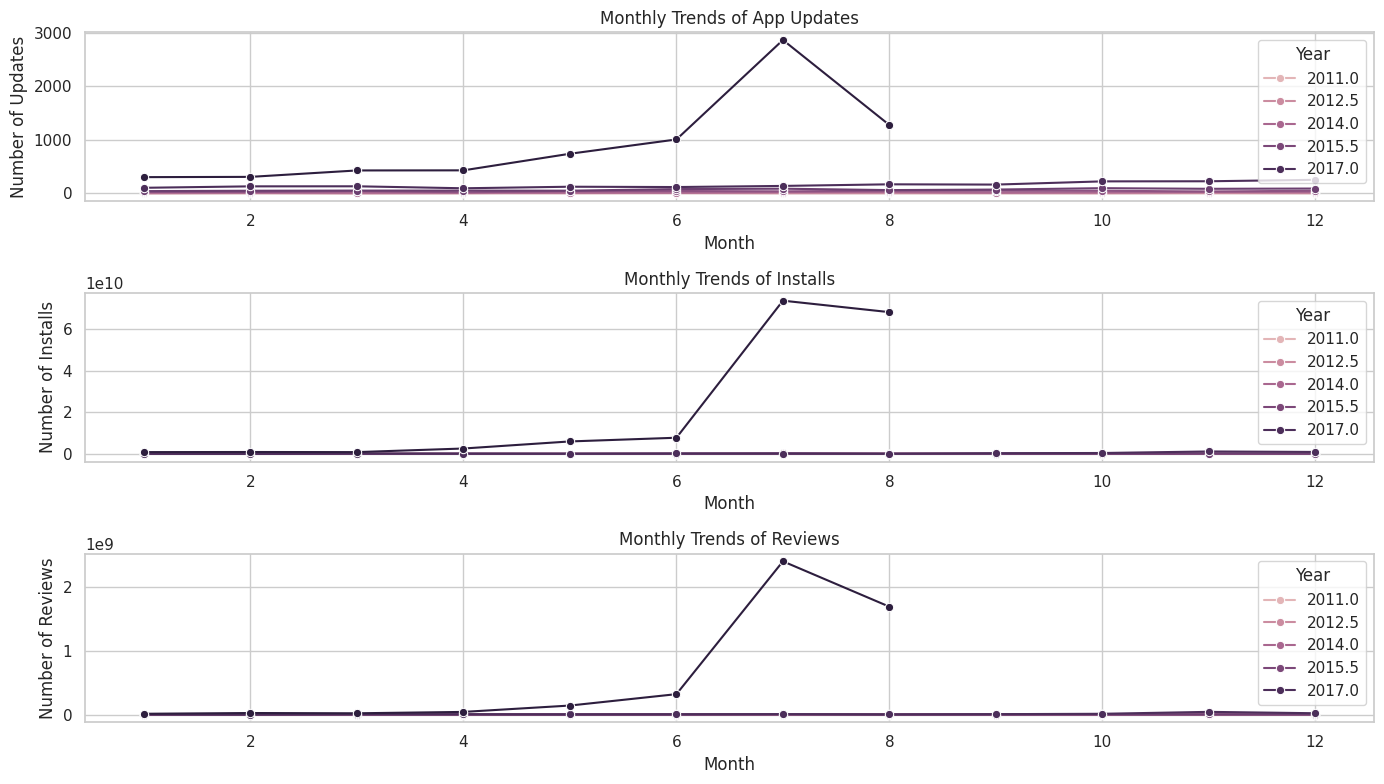

In [89]:
# Create line charts for monthly trends
plt.figure(figsize=(14, 8))

# Updates
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_trends, x='Month', y='Updates', hue='Year', marker='o')
plt.title('Monthly Trends of App Updates')
plt.xlabel('Month')
plt.ylabel('Number of Updates')

# Installs
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_trends, x='Month', y='Installs', hue='Year', marker='o')
plt.title('Monthly Trends of Installs')
plt.xlabel('Month')
plt.ylabel('Number of Installs')

# Reviews
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_trends, x='Month', y='Reviews', hue='Year', marker='o')
plt.title('Monthly Trends of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


Heatmap: Density of App Updates, Installs, and Reviews by Month and Year

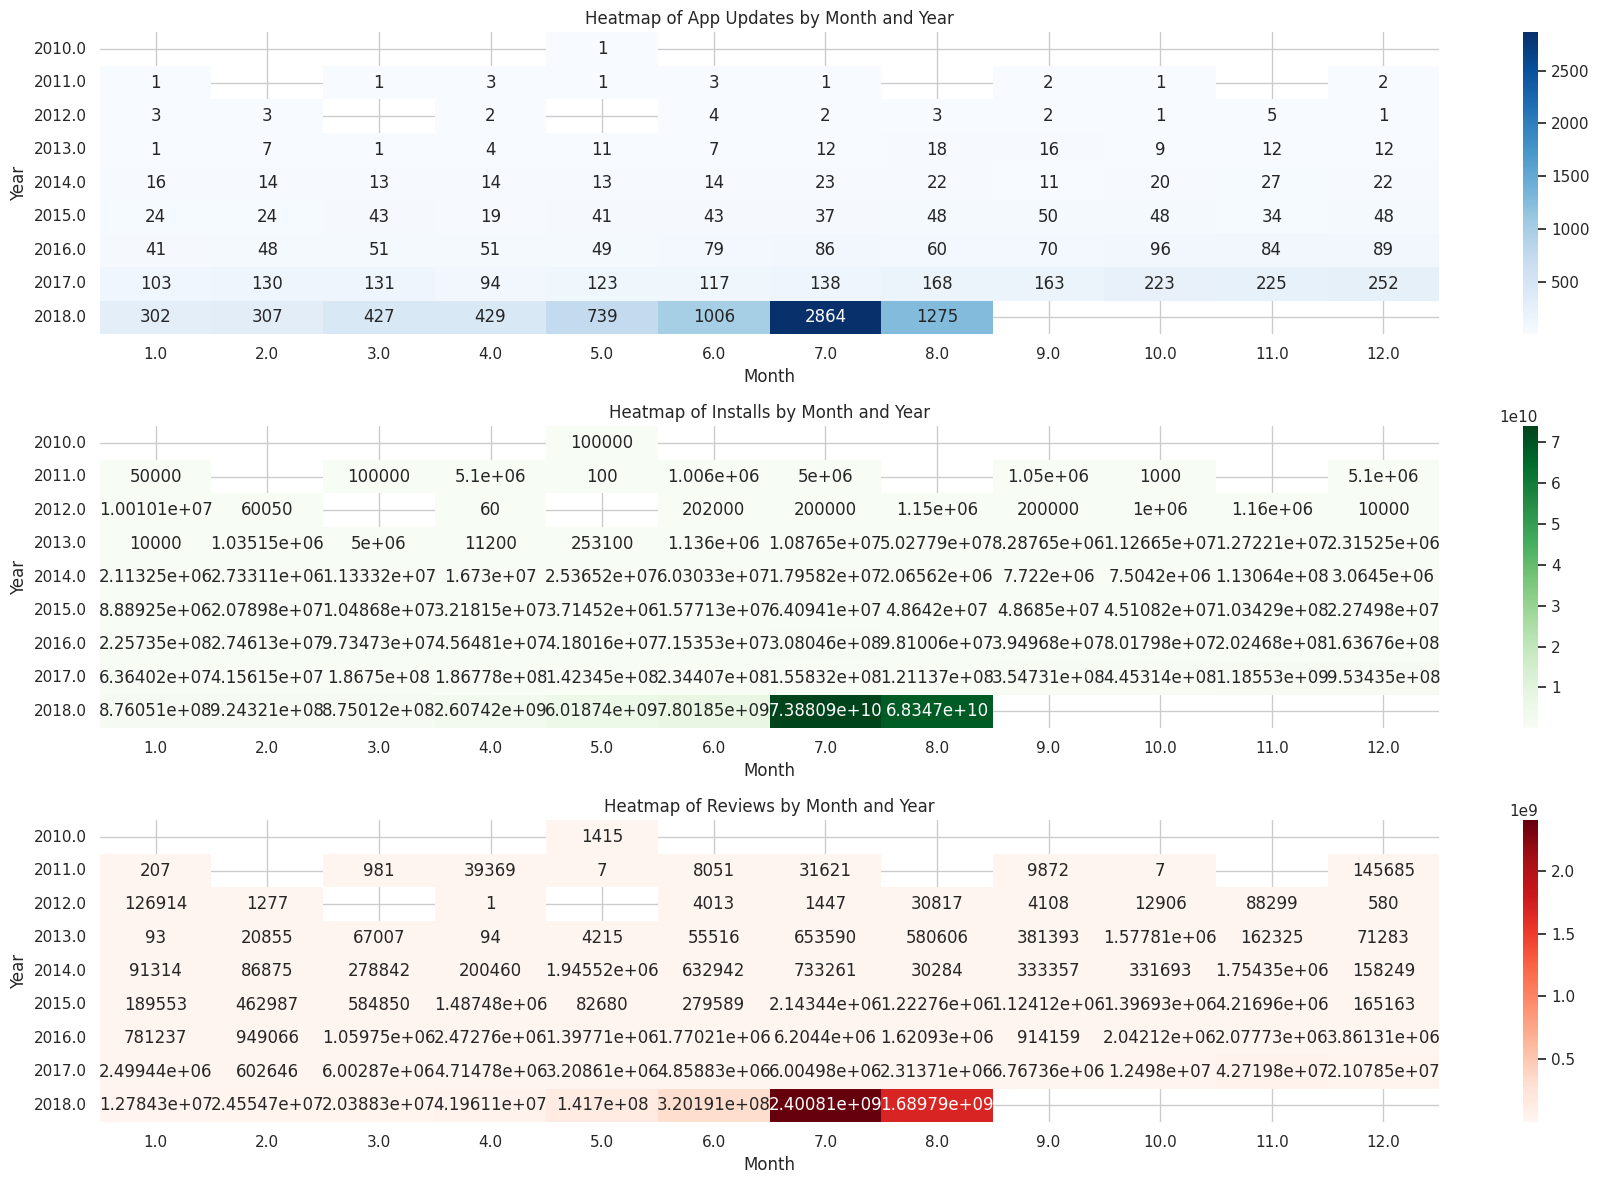

In [91]:
# Pivot the data for heatmaps
updates_pivot = pd.pivot_table(monthly_trends, values='Updates', index='Year', columns='Month', aggfunc='sum')
installs_pivot = pd.pivot_table(monthly_trends, values='Installs', index='Year', columns='Month', aggfunc='sum')
reviews_pivot = pd.pivot_table(monthly_trends, values='Reviews', index='Year', columns='Month', aggfunc='sum')

# Create heatmaps
plt.figure(figsize=(18, 12))

# Updates Heatmap
plt.subplot(3, 1, 1)
sns.heatmap(updates_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of App Updates by Month and Year')

# Installs Heatmap
plt.subplot(3, 1, 2)
sns.heatmap(installs_pivot, cmap='Greens', annot=True, fmt='g')
plt.title('Heatmap of Installs by Month and Year')

# Reviews Heatmap
plt.subplot(3, 1, 3)
sns.heatmap(reviews_pivot, cmap='Reds', annot=True, fmt='g')
plt.title('Heatmap of Reviews by Month and Year')

plt.tight_layout()
plt.show()


Bar Chart: Number of Installs and Reviews per Month

<ipython-input-92-67ca82296e0d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Installs', palette='viridis')
<ipython-input-92-67ca82296e0d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Reviews', palette='magma')


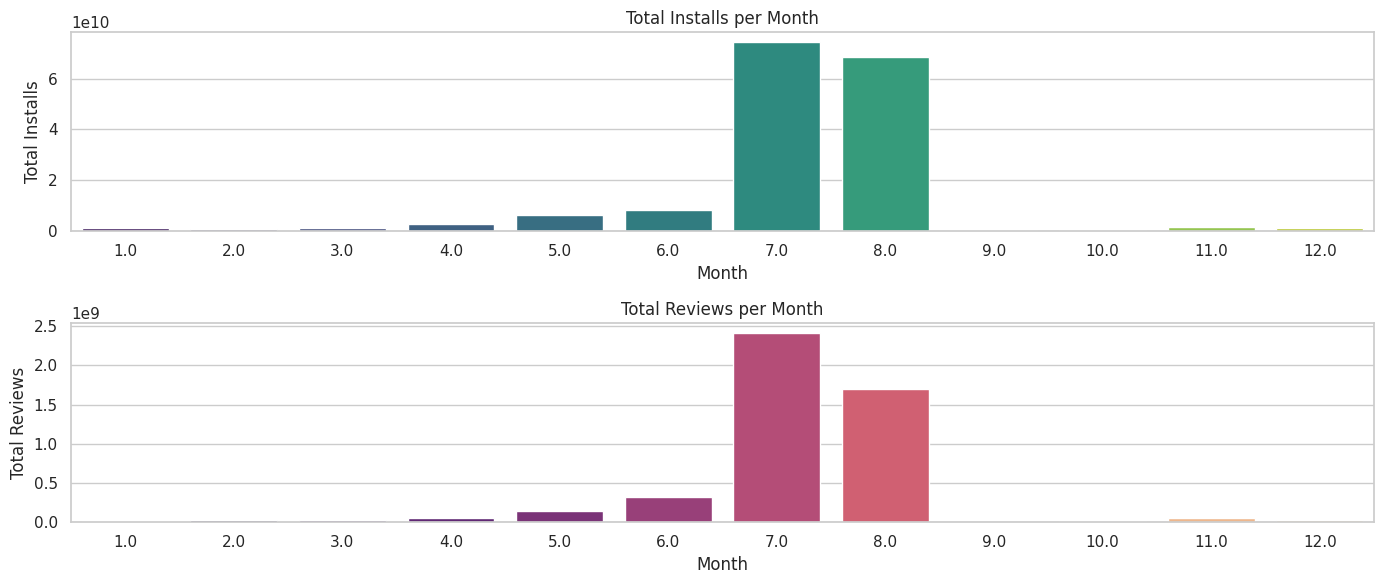

In [92]:
# Group data by month across all years to find overall trends
monthly_avg = data_clean.groupby('Month').agg({
    'Installs': 'sum',
    'Reviews': 'sum'
}).reset_index()

# Create bar charts
plt.figure(figsize=(14, 6))

# Installs per month
plt.subplot(2, 1, 1)
sns.barplot(data=monthly_avg, x='Month', y='Installs', palette='viridis')
plt.title('Total Installs per Month')
plt.xlabel('Month')
plt.ylabel('Total Installs')

# Reviews per month
plt.subplot(2, 1, 2)
sns.barplot(data=monthly_avg, x='Month', y='Reviews', palette='magma')
plt.title('Total Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Total Reviews')

plt.tight_layout()
plt.show()


### Recommendations

Based on the analysis, the marketing research firm can identify the following:

- **Peak Months**: Months with the highest number of installs and reviews.
- **Seasonal Trends**: Any seasonal patterns in app updates, installs, and user engagement.
- **Optimal Launch Period**: Months with high user activity but possibly fewer app updates, indicating less competition.

This information will help the firm recommend the best time to launch a new app to maximize visibility and user engagement.